In [1]:
import numpy as np
import pandas as pd

In [2]:
import distribution_modules as dm
import density_estimation_modules as dem
import classification_modules as cm
import importlib

importlib.reload(dm)
importlib.reload(dem)
importlib.reload(cm)

<module 'classification_modules' from 'C:\\Users\\shfar\\Desktop\\SU\\Thesis\\thesis\\classification_modules.py'>

In [3]:
# set configurations
num_steps = 10
x = np.linspace(0,1,num_steps)

# cv config
test_size = 0.2
cv = 5
cv_config = [test_size, cv]

In [4]:
data = pd.read_csv('graphwave_ac_data.csv')
data.head(3)

,0,1,2,3,4,5,6,7,8,9,...,1611,1612,1613,1614,1615,1616,1617,1618,1619,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,B5_0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,B5_0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,B5_0


In [5]:
edf_df = dem.get_edf(data,x)

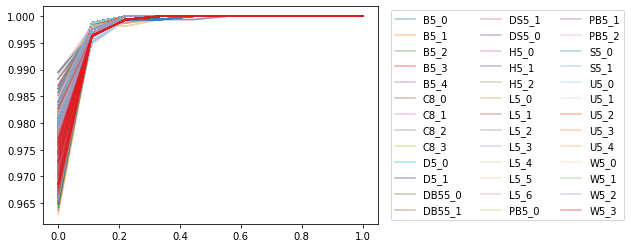

In [6]:
dem.get_kde_plot(edf_df,x)

In [7]:
num_steps_list = list(np.arange(5,200,5))

In [12]:
res_svm = cm.cv_numsteps_edf(num_steps_list, data, cv_config, 1)

  0%|          | 0/39 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [10]:
res_lr = cm.cv_numsteps_edf(num_steps_list, data, cv_config, 2)

  0%|          | 0/39 [00:00<?, ?it/s]

In [11]:
cm.plot_cv_kde(res_svm, res_lr, errbar=1)

NameError: name 'res_svm' is not defined

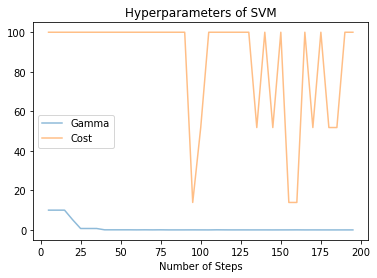

In [31]:
cm.plot_h_params_kde(res_svm)

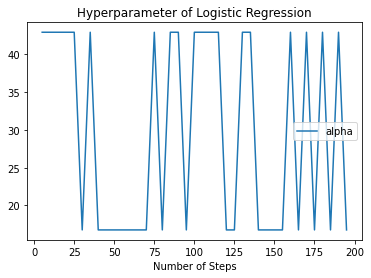

In [56]:
cm.plot_h_params_kde(res_lr)

In [ ]:
num_steps = 
x = np.linspace(0,1,num_steps)
edf_df = dem.get_edf(data, x)
cm.svm_model(edf_df, cv_config, plot=1 )

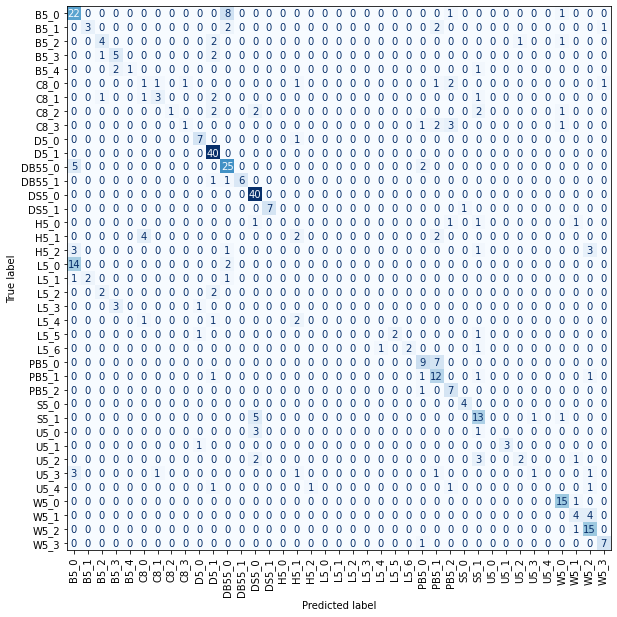

(array([0.63848397, 0.64723032, 0.64619883, 0.65204678, 0.5994152 ]),
 16.768329368110084)

In [58]:
num_steps = 200
x = np.linspace(0,1,num_steps)
edf_df = dem.get_edf(data, x)
cm.rr_model(edf_df, cv_config, plot=1 )